In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 21


(1000,)


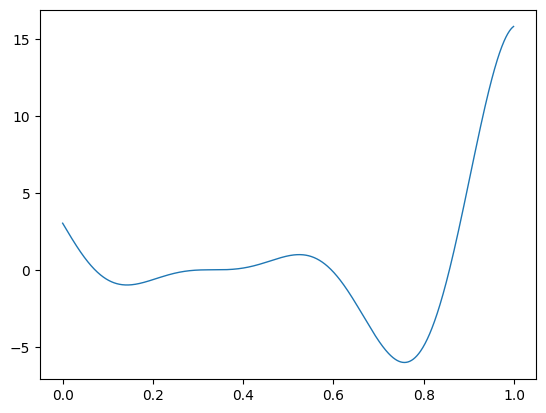

(1000, 1)


In [2]:
# Load Forrester model

Forrester_Data = BB_Model('Forrester')

#Forrester_Data.df().head()

In [3]:
Forrester_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.2539255185985606


MLPRegressor(random_state=RandomState(MT19937) at 0x18E20B89840)

In [4]:
Forrester_Data.Random_Forest()

0.9999552283178763


RandomForestRegressor(random_state=RandomState(MT19937) at 0x18E20B89840)

In [5]:
Forrester_Data.GP()

0.9939911580039646


GaussianProcessRegressor()

In [6]:
print(Forrester_Data.get_features())

['X']


In [7]:
#Default settings
from unravel.tabular import UnRAVELTabularExplainer

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
Unravel_Exp = UnRAVELTabularExplainer(bbox_model           = Forrester_Data.get_GP(),
                                      train_data           = X_train,
                                      categorical_features = Forrester_Data.get_catagorical(),
                                      mode                 = Forrester_Data.get_mode())

sur_GP = Surrogate_GP()


warning in stationary: failed to import cython module: falling back to numpy
warning in coregionalize: failed to import cython module: falling back to numpy
warning in choleskies: failed to import cython module: falling back to numpy


In [8]:
#Default settings
#from unravel_2.ur_model import UR_Model

#X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()


##Initializing the explainer object
#Unravel_Exp = UR_Model(bbox_model           = Forrester_Data.get_Random_Forest(),
#                       train_data           = X_train,
#                       categorical_features = Forrester_Data.get_catagorical(),
#                       mode                 = Forrester_Data.get_mode())       


In [9]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [0.4991775]
Std 0:  [0.2900885]


In [10]:
#for i in range(5):
#    print(X_test[i,:])

In [11]:
#from matplotlib import pyplot
#pyplot.boxplot(x=X_test)
#pyplot.show()

In [12]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.05*test_instance])
    
    #scores, acq_data = Unravel_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = Unravel_Exp.explain(X_init            = data_row.reshape(1, -1),
                                           feature_names     = Forrester_Data.get_features(),
                                           alpha             = "FUR",
                                           max_iter          = 20,
                                           normalize         = False,
                                           interval          = 1,
                                           importance_method = "ARD")
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    #e_predict = Unravel_Exp.gpmodel_predict(data_row)
    #e_predict = np.array(e_predict).ravel()
    
    acq_data = Unravel_Exp.get_acq_data()
    
    X, y = Unravel_Exp.get_surrogate_data()

    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(Unravel_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0(),
                               model         = Unravel_Exp.get_gpmodel())


INSTANCE:  0
[4.02071381e+00 1.00000004e-05]
[2.99402569] [4.02071381e+00 1.00000004e-05]
INSTANCE:  1
[2.94418335e-01 1.00000004e-05]
[0.73472439] [2.94418335e-01 1.00000004e-05]
INSTANCE:  2
[-5.27946472e-01  1.00000004e-05]
[-0.65464773] [-5.27946472e-01  1.00000004e-05]
INSTANCE:  3
[-5.37429810e-01  1.00000004e-05]
[-0.97791461] [-5.37429810e-01  1.00000004e-05]
INSTANCE:  4
[-5.23918152e-01  1.00000004e-05]
[-0.64150009] [-5.23918152e-01  1.00000004e-05]
INSTANCE:  5
[-5.66566467e-01  1.00000004e-05]
[-0.20985907] [-5.66566467e-01  1.00000004e-05]
INSTANCE:  6
[-4.84291077e-01  1.00000004e-05]
[-0.01518041] [-4.84291077e-01  1.00000004e-05]
INSTANCE:  7
[-1.33132934e-01  9.99999486e-06]
[0.00210908] [-1.33132934e-01  9.99999486e-06]
INSTANCE:  8
[4.45236206e-01 1.00000004e-05]
[0.11164575] [4.45236206e-01 1.00000004e-05]
INSTANCE:  9
[1.00718689e+00 1.00000004e-05]
[0.48241385] [1.00718689e+00 1.00000004e-05]
INSTANCE:  10
[1.19364929e+00 1.00000004e-05]
[0.90870056] [1.19364929e

In [13]:
import matplotlib.pyplot as plt


In [14]:
print(f_predict)
print(e_predict)


[15.7901344]
[1.56676941e+01 1.00000004e-05]


In [15]:
Forrester_Stats.Fidelity()

Average, Var, and Max Differences:
y - BB(x):           4.163446705801524  :  17.29794878035637  :  15.419677985309521
y - exp(x):          4.018736593616491  :  17.62957705277765  :  15.523641896256589
BB(x) - exp(x):      0.33019619194000477  :  0.047234476946635  :  1.0266881182873173
Average exp(x) var:  1.0000000149362967e-05


In [21]:
#Forrester_Stats.Jaccard_Values()

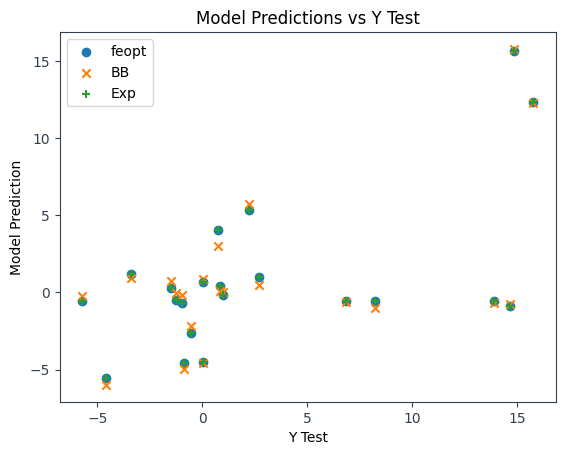

In [17]:
Forrester_Stats.Reg_Fidelity_Graph()

In [18]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

X, y = Unravel_Exp.get_surrogate_data()
kernel = Matern()

GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
GP.fit(X, y)
        
print(y[0])
fe = GP.predict(X[0].reshape(1,-1))
print(fe)
ey = Unravel_Exp.gpmodel_predict(X[0].reshape(1,-1))
print(ey)


[15.66769409]
[15.66769409]
(array([[0.52074945]]), array([[6.15951924e-05]]))


In [19]:
STOP!!
acq_data.plot_point()

<class 'SyntaxError'>: invalid syntax (C:/Users/deneb/AppData/Local/Temp/xpython_4232/1632470621.py, line 1)

In [ ]:
acq_data.plot_point(1)

In [ ]:
acq_data.plot_point(2)

In [ ]:
acq_data.plot_point(3)

In [ ]:
acq_data.plot_point(4)

In [ ]:
acq_data.plot_point(5)

In [ ]:
acq_data.plot_point(6)

In [ ]:
acq_data.plot_point(7)

In [ ]:
acq_data.plot_point(8)

In [ ]:
acq_data.plot_point(9)

In [ ]:
acq_data.plot_point(10)

In [ ]:
acq_data.plot_point(11)

In [ ]:
acq_data.plot_point(12)

In [ ]:
acq_data.plot_point(13)

In [ ]:
acq_data.plot_point(14)

In [ ]:
acq_data.plot_point(15)

In [ ]:
acq_data.plot_point(16)

In [ ]:
acq_data.plot_point(17)

In [ ]:
acq_data.plot_point(18)

In [ ]:
acq_data.plot_point(19)

In [ ]:
acq_data.plot_all()